In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import t


n = 50

slow_rep = pd.read_csv("M40_T60_K16.csv").fillna(0)
balanced_rep = pd.read_csv("M20_T30_K8.csv").fillna(0)
fast_rep = pd.read_csv("M10_T15_K4.csv").fillna(0)

slow_rep = slow_rep[slow_rep["type"] == "scalar"]
slow_rep_Qi = dict()
for i in range(4):
    temp = []
    temp = [slow_rep.value.values[j * 4 + i] for j in range(n)]
    string = f"Q{i}"
    slow_rep_Qi[string] = temp
slow_df = pd.DataFrame(slow_rep_Qi)

balanced_rep = balanced_rep[balanced_rep["type"] == "scalar"]
balanced_rep_Qi = dict()
for i in range(4):
    temp = []
    temp = [balanced_rep.value.values[j * 4 + i] for j in range(n)]
    string = f"Q{i}"
    balanced_rep_Qi[string] = temp
balanced_df = pd.DataFrame(balanced_rep_Qi)

fast_rep = fast_rep[fast_rep["type"] == "scalar"]
fast_rep_Qi = dict()
for i in range(4):
    temp = []
    temp = [fast_rep.value.values[j * 4 + i] for j in range(n)]
    string = f"Q{i}"
    fast_rep_Qi[string] = temp
fast_df = pd.DataFrame(fast_rep_Qi)

consistency = {
    "Slow": slow_df,
    "Balanced": balanced_df,
    "Fast": fast_df
}



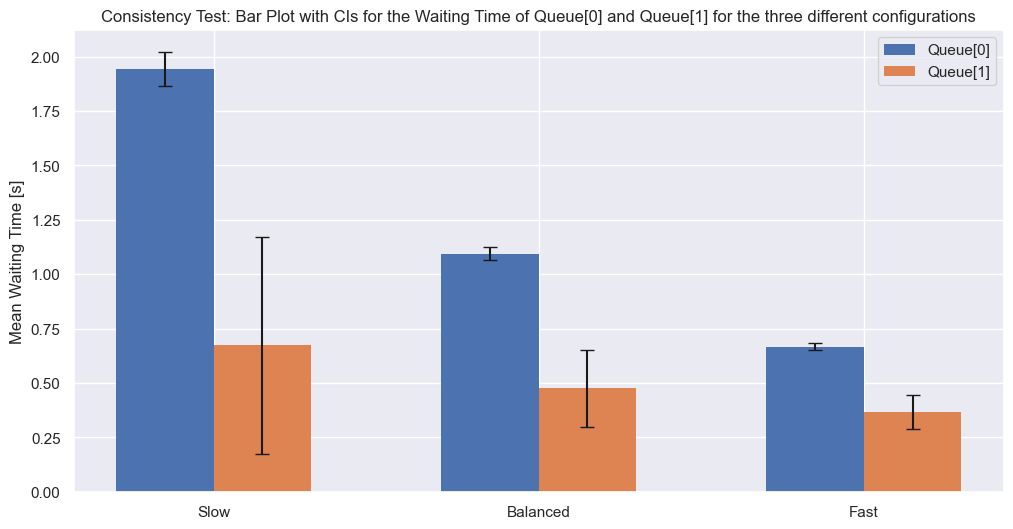

In [23]:
# width of the bars
barWidth = 0.3

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Choose the height of the bars
Q0_bars = []
Q1_bars = []
for value in consistency.values():
    Q0_bars.append(value["Q0"].mean())
    Q1_bars.append(value["Q1"].mean())


# Choose the height of the error bars 
yerr_Q0 = []
yerr_Q1 = []
for value in consistency.values():
    yerr_Q0.append(1.96 * (value["Q0"].std() / math.sqrt(n)))
    yerr_Q1.append(1.96 * (value["Q1"].std() / math.sqrt(n)))


# The x position of bars
r1 = np.arange(len(Q0_bars))
r2 = [x + barWidth for x in r1]
 
# Create Q0 bars
plt.bar(r1, Q0_bars, width = barWidth, edgecolor = 'black', yerr=yerr_Q0, capsize=5, label='Queues[0]', lw=0)
 
# Create Q1 bars
plt.bar(r2, Q1_bars, width = barWidth, edgecolor = 'black', yerr=yerr_Q1, capsize=5, label='Queues[1]', lw=0)
 
# General layout
plt.xticks([r + barWidth/2 for r in range(len(Q0_bars))], consistency.keys()) 

# Show graphic
plt.title('Consistency Test: Bar Plot with CIs for the Waiting Time of Queues[0] and Queues[1] for the three different configurations')
plt.ylabel('Mean Waiting Time [s]')

plt.legend()
plt.show()



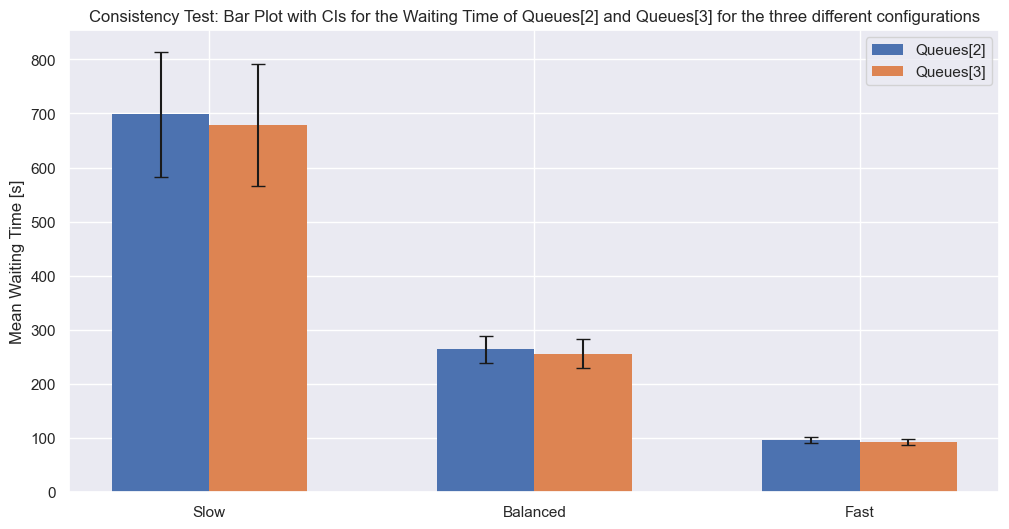

In [25]:
# width of the bars
barWidth = 0.3

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Choose the height of the bars
Q2_bars = []
Q3_bars = []
for value in consistency.values():
    Q2_bars.append(value["Q2"].mean())
    Q3_bars.append(value["Q3"].mean())


# Choose the height of the error bars 
yerr_Q2 = []
yerr_Q3 = []
for value in consistency.values():
    yerr_Q2.append(1.96 * (value["Q2"].std() / math.sqrt(n)))
    yerr_Q3.append(1.96 * (value["Q3"].std() / math.sqrt(n)))


# The x position of bars
r1 = np.arange(len(Q2_bars))
r2 = [x + barWidth for x in r1]
 
# Create Q2 bars
plt.bar(r1, Q2_bars, width = barWidth, edgecolor = 'black', yerr=yerr_Q2, capsize=5, label='Queues[2]', lw=0)
 
# Create Q3 bars
plt.bar(r2, Q3_bars, width = barWidth, edgecolor = 'black', yerr=yerr_Q3, capsize=5, label='Queues[3]', lw=0)
 
# General layout
plt.xticks([r + barWidth/2 for r in range(len(Q2_bars))], consistency.keys())

# Show graphic
plt.title('Consistency Test: Bar Plot with CIs for the Waiting Time of Queues[2] and Queues[3] for the three different configurations')
plt.ylabel('Mean Waiting Time [s]')

plt.legend()
plt.show()

